In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import metrics 
from pandas import DataFrame
pylab.rcParams['figure.figsize'] = 10, 8

Populating the interactive namespace from numpy and matplotlib


E:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
libra = pd.read_csv('libra.csv')
libra.head()

,label,class,LW,LD,RW,RD
0,1,B,1,1,1,1
1,2,R,1,1,1,2
2,2,R,1,1,1,3
3,2,R,1,1,1,4
4,2,R,1,1,1,5


In [3]:
libra.shape

(625, 6)

In [4]:
print(libra['class'].unique())

['B' 'R' 'L']


In [5]:
print(libra.groupby('class').size())

class
B     49
L    288
R    288
dtype: int64


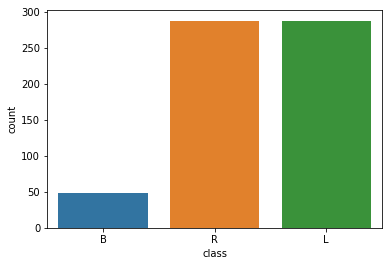

In [6]:
import seaborn as sns
sns.countplot(libra['class'],label="Count")
plt.show()

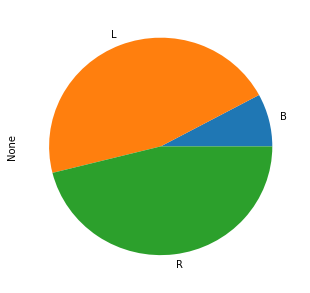

In [7]:
libra.groupby(['class']).size().plot(kind = 'pie', figsize = (5, 5))

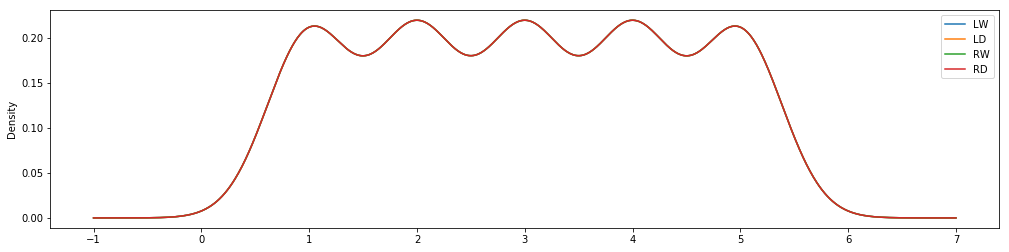

In [8]:
libra.drop('label', axis=1).plot(kind = 'kde', figsize = (17, 4))

In [9]:
libra.groupby(['class']).aggregate([numpy.mean, np.median, np.std])

label                    LW                         LD                   \
       mean median  std      mean median       std      mean median       std   
class                                                                           
B         1      1  0.0  2.938776      3  1.420214  2.938776      3  1.420214   
L         3      3  0.0  3.611111      4  1.227508  3.611111      4  1.227508   
R         2      2  0.0  2.399306      2  1.331840  2.399306      2  1.331840   

             RW                         RD                   
           mean median       std      mean median       std  
class                                                        
B      2.938776      3  1.420214  2.938776      3  1.420214  
L      2.399306      2  1.331840  2.399306      2  1.331840  
R      3.611111      4  1.227508  3.611111      4  1.227508

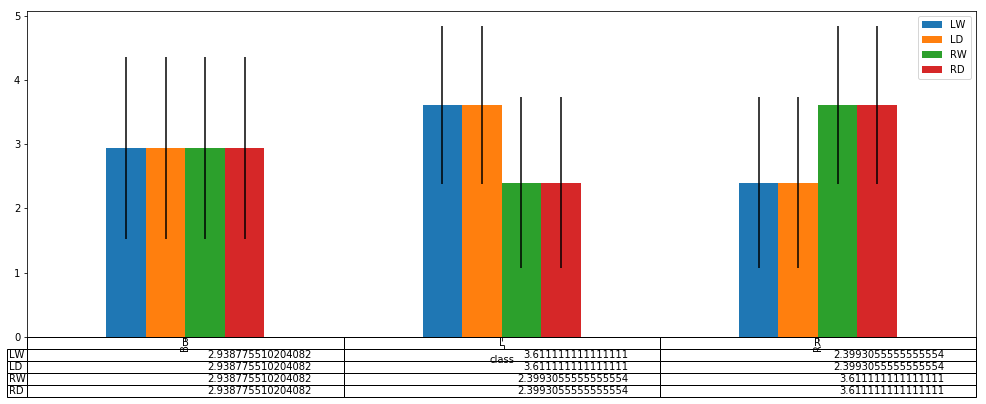

In [10]:
groups = libra.groupby(['class'])
means, sds = groups.mean(), groups.std()
means.drop('label', axis=1).plot(yerr = sds, kind = 'bar', figsize = (17, 6), table = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B7F7A90>,
      dtype=object)

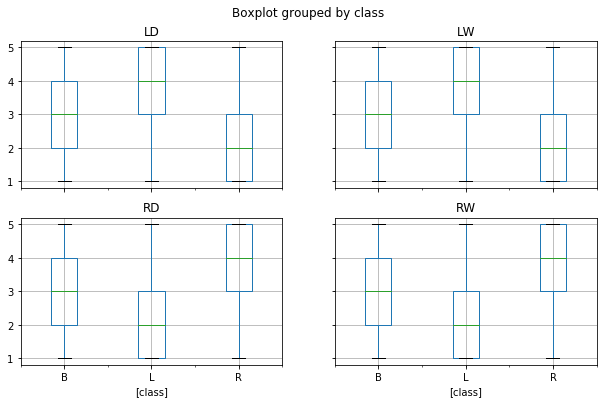

In [11]:
libra.drop('label', axis=1).boxplot(by = "class", figsize = (10, 6))

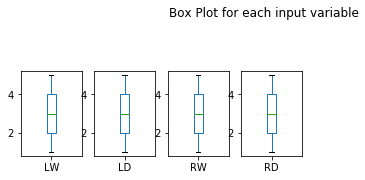

In [12]:
libra.drop('label', axis=1).plot(kind='box', subplots=True, layout=(5,7), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
plt.savefig('libra_box')
plt.show()

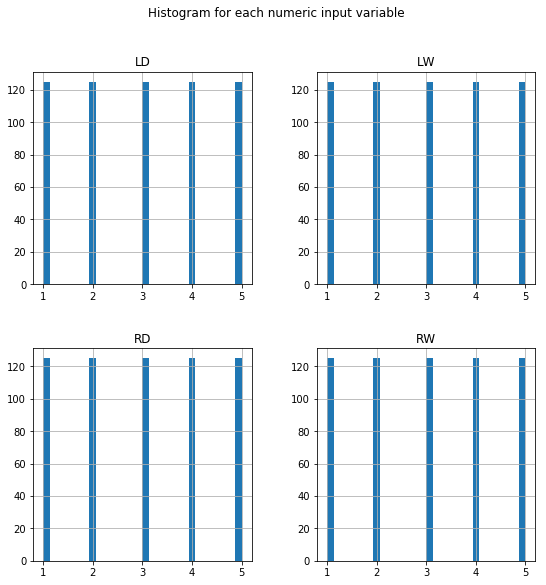

In [13]:
import pylab as pl
libra.drop('label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('libra_hist')
plt.show()

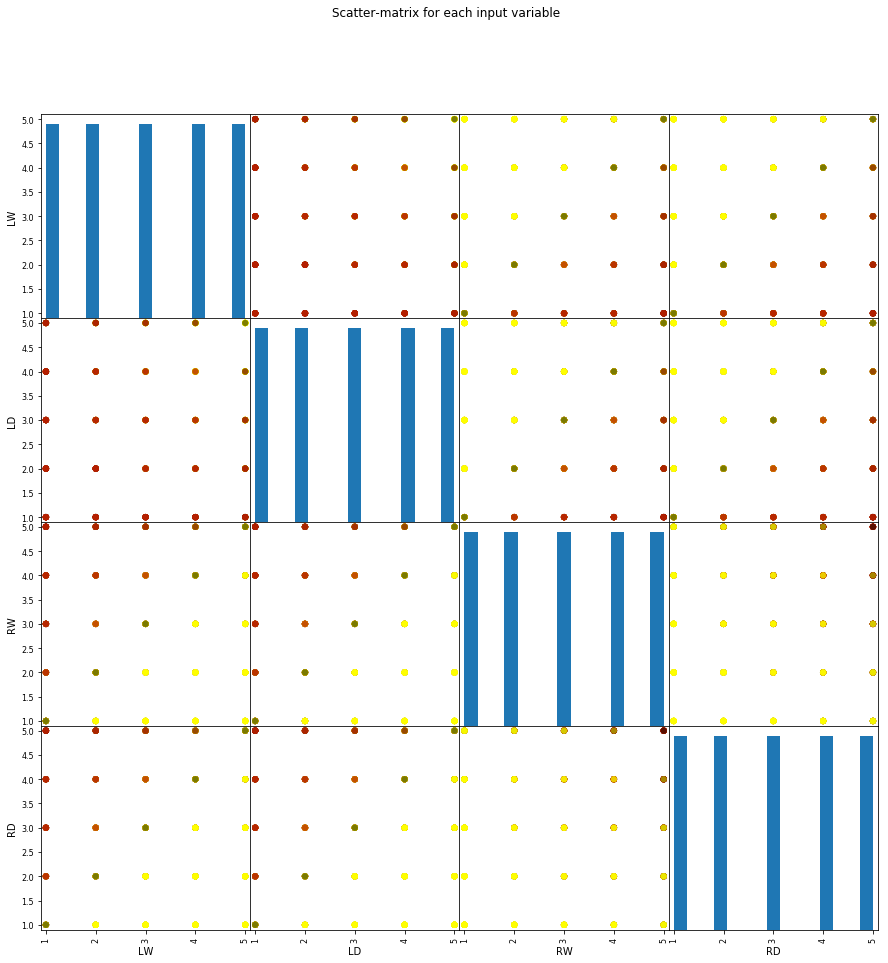

In [14]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['LW', 'LD', 'RW', 'RD']
X = libra[feature_names]
y = libra['label']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(15,15), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('libra_scatter_matrix')

In [15]:
from pandas import DataFrame
df = pd.DataFrame.from_csv('libra.csv')
df[:5]
df[['LW', 'LD', 'RW', 'RD']].corr()

E:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,LW,LD,RW,RD
LW,1.0,0.0,0.0,0.0
LD,0.0,1.0,0.0,0.0
RW,0.0,0.0,1.0,0.0
RD,0.0,0.0,0.0,1.0


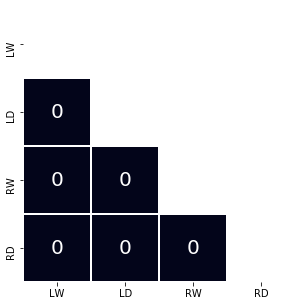

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))  
import seaborn as sns
corr = df[['LW', 'LD', 'RW', 'RD']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask, square=True, cbar=False,
                      annot=True, annot_kws={"size": 20},
                      linewidths=.5, ax=ax)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.80


In [19]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[[ 0  5  3]
 [ 7 59  3]
 [ 9  4 67]]
0.802547770700637
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         8
          2       0.87      0.86      0.86        69
          3       0.92      0.84      0.88        80

avg / total       0.85      0.80      0.82       157



In [20]:
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X = libra[['LW', 'LD', 'RW', 'RD']]
y = libra['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_libra_knn(X, y, n_neighbors, weights):
    X_mat = X[['LW', 'RW']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='B')
    patch1 = mpatches.Patch(color='#00FF00', label='L')
    patch2 = mpatches.Patch(color='#0000FF', label='R')
    plt.legend(handles=[patch0, patch1, patch2])

        
    plt.xlabel('LW')
    plt.ylabel('RW')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

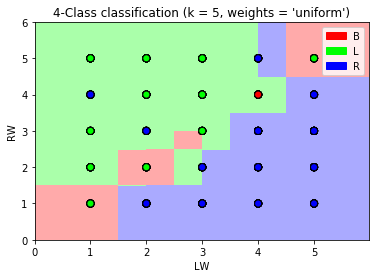

In [21]:
plot_libra_knn(X_train, y_train, 5, 'uniform')

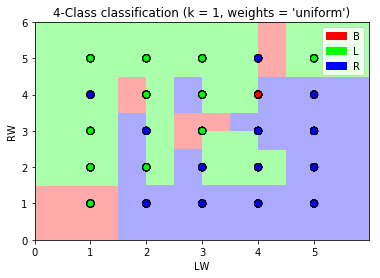

In [22]:
plot_libra_knn(X_train, y_train, 1, 'uniform')

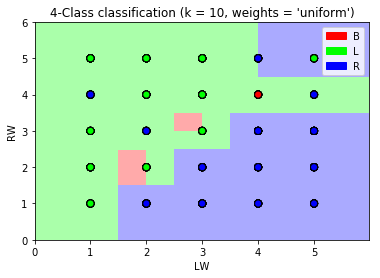

In [23]:
plot_libra_knn(X_train, y_train, 10, 'uniform')

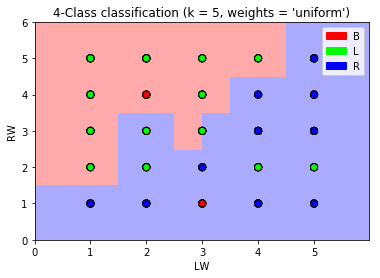

In [24]:
plot_libra_knn(X_test, y_test, 5, 'uniform')

([<matplotlib.axis.XTick at 0x1b4a8eb8>,
 <a list of 5 Text xticklabel objects>)

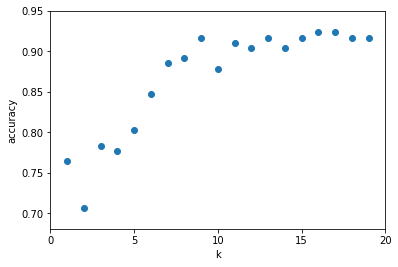

In [25]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [26]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state=0)
modelknn = KNeighborsClassifier()
scores = cross_validation.cross_val_score(modelknn, X_train, y_train, cv=10)
print (scores.mean())

0.8012573234659266


In [27]:
from sklearn import linear_model
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(X, y, random_state=0)
modelsgdc = linear_model.SGDClassifier(alpha=0.001, n_iter=100, random_state = 0)
scores = cross_validation.cross_val_score(modelsgdc, train_data, train_labels, cv=10)
print (scores.mean())

0.8722204234762051


E:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Program Files (x86)\Anaconda\lib\site-pac

In [29]:
from sklearn.metrics import accuracy_score, classification_report
modelsgdc.fit(train_data, train_labels)
model_predictions = modelsgdc.predict(test_data)
print ("accuracy: ", accuracy_score(test_labels, model_predictions))
print (classification_report(test_labels, model_predictions))

accuracy:  0.89171974522293
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         8
          2       0.97      0.88      0.92        69
          3       0.84      0.99      0.91        80

avg / total       0.85      0.89      0.87       157



E:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


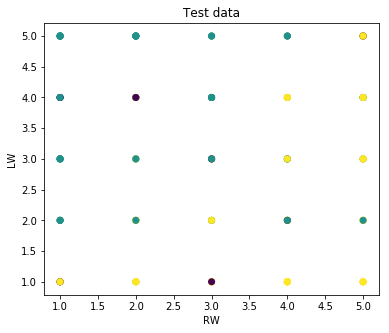

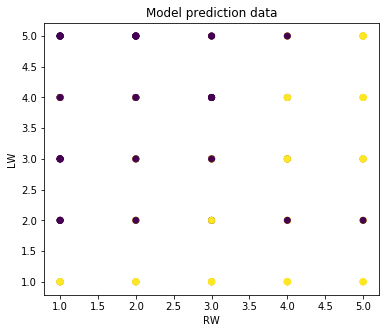

In [30]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(1, figsize=(6, 5))
plt.scatter(test_data['LW'], test_data['RW'], c=test_labels.astype(np.float))
plt.ylabel('LW')
plt.xlabel('RW')
plt.title('Test data')
plt.show()
fig = plt.figure(1, figsize=(6, 5))
plt.ylabel('LW')
plt.xlabel('RW')
plt.title('Model prediction data')
plt.scatter(test_data['LW'], test_data['RW'], c=model_predictions.astype(np.float))

plt.show()

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
modelsgdc = LinearDiscriminantAnalysis()
modelsgdc.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(modelsgdc.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(modelsgdc.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.87
Accuracy of LDA classifier on test set: 0.88
